# Applied ML
## About Iris dataset
![](https://www.oreilly.com/library/view/python-artificial-intelligence/9781789539462/assets/462dc4fa-fd62-4539-8599-ac80a441382c.png)
The iris dataset contains the following data
* 50 samples of 3 different species of iris (150 samples total)
* Measurements: sepal length, sepal width, petal length, petal width
* The format for the data: (sepal length, sepal width, petal length, petal width)

### The variables are:
![](https://i.imgur.com/PQqYGaW.png)
* sepal_length: Sepal length, in centimeters, used as input.
* sepal_width: Sepal width, in centimeters, used as input.
* petal_length: Petal length, in centimeters, used as input.
* petal_width: Petal width, in centimeters, used as input.
* class: Iris Setosa, Versicolor, or Virginica, used as the target.

# Contents
### Data Preprocessing
* Include Libraries
* Import DataSet
* Handle Missing Value

### Data Visualization
* Scatterplot
* Pairplot

Feature Engineering

### Machine learning Models
* Logistic Regression
* Random Forest Classifier
* Naive Bayes
* KNN
* Decision Tree
* Support Vector Machine


# 1. Data Preprocessing

### Importing pandas, numpy, matplotlib and Seaborn module

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Iris data set

In [ ]:
iris=pd.read_csv('IRIS.csv') # If your data has corrupted entries, use on_bad_lines='skip' parameters when performing the read

### Displaying data

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

This data set has three varities of Iris plant.

In [ ]:
iris.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


## Checking if there are any missing values
![](https://blogs.worldbank.org/sites/default/files/opendata/missing-data.jpg)

In [ ]:
# We can see there are no missing values in this dataset, else we might have had to deal with them (remove/fill them).
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# 2. Data Visualization

## 2.1 Scatterplot
A scatter plot is a two-dimensional data visualization that uses dots to represent the values obtained for two different variables — one plotted along the x-axis and the other plotted along the y-axis
We can plot the scatter plot between any two features.

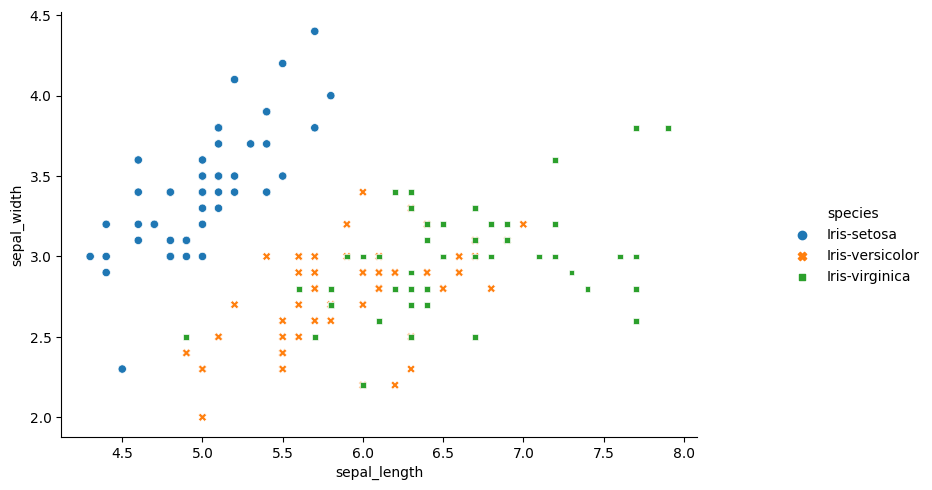

In [ ]:
g=sns.relplot(x='sepal_length',y='sepal_width',data=iris,hue='species',style='species')
g.fig.set_size_inches(10,5)
plt.show()

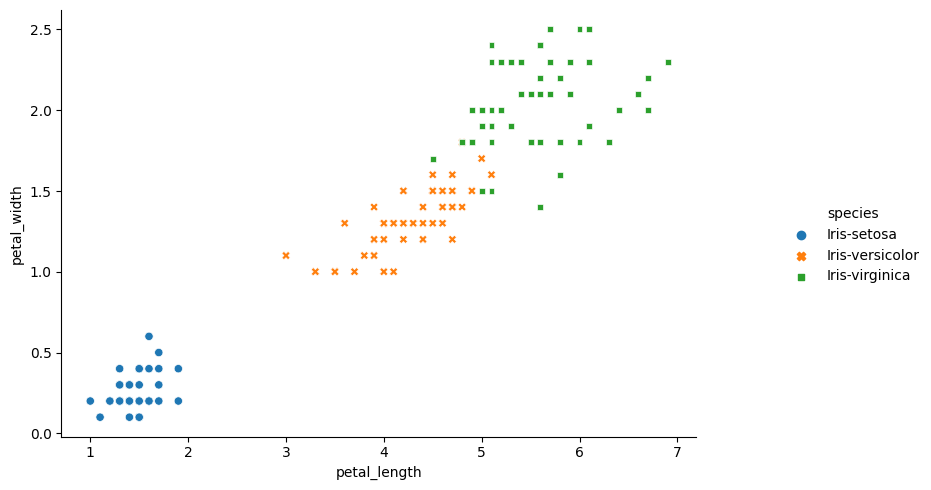

In [ ]:
g=sns.relplot(x='petal_length',y='petal_width',data=iris,hue='species',style='species')
g.fig.set_size_inches(10,5)
plt.show()

The Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better differentiating the 3 species.

## 2.2 Pairplot
Pair Plots are a really simple (one-line-of-code simple!) way to visualize relationships between each variable. It produces a matrix of relationships between each variable in your data for an instant examination of it.

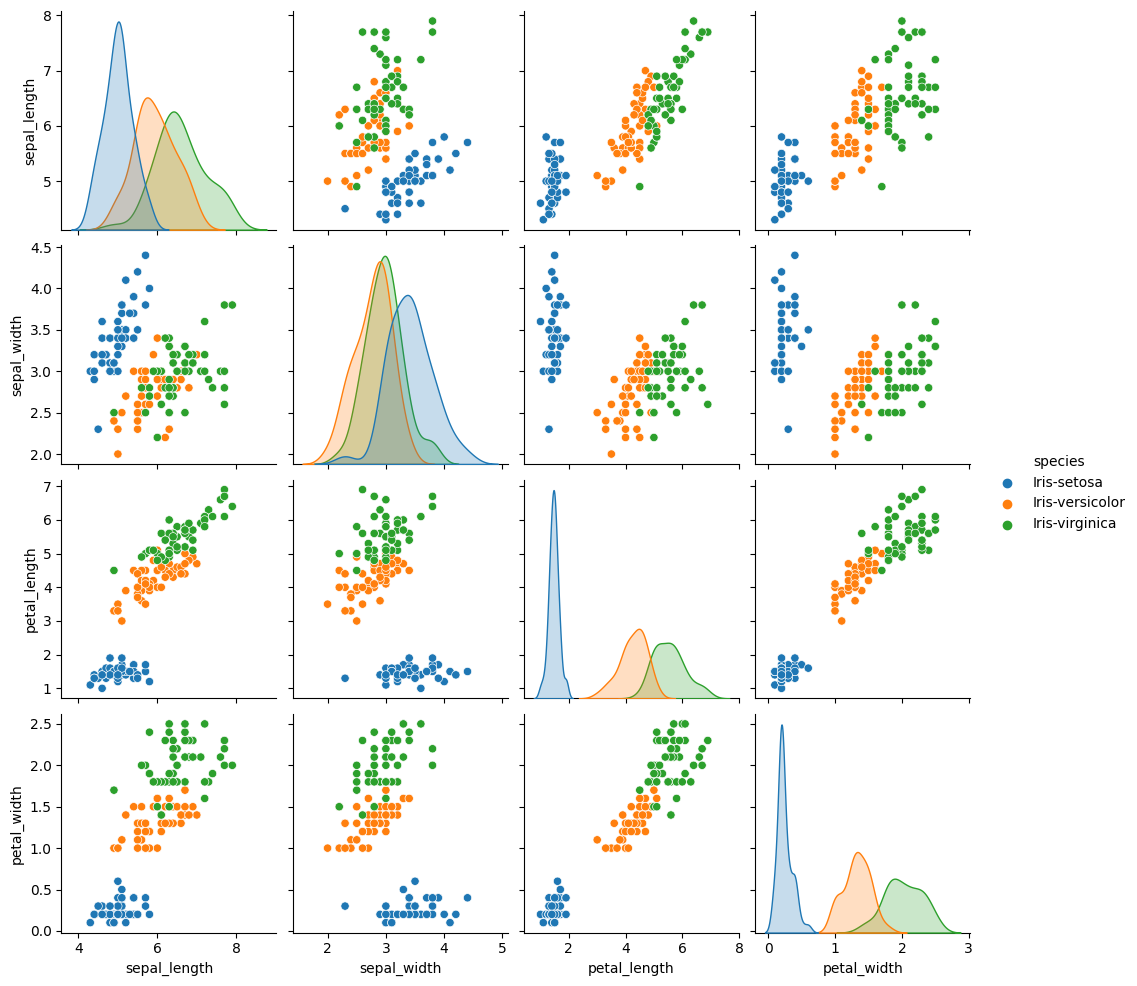

In [ ]:
sns.pairplot(iris,hue="species")
plt.show()

## 2.3 Correlation
![](https://www.mathsisfun.com/data/images/correlation-examples.svg)


The number of features and their correlation plays an important role when training a model. If we have many features, out of which some are strongly correlated and relevant, whereas some are for the most part useless - then training an algorithm with all the available features may reduce the accuracy.

The current dataset has very few features, all of which are quite relevant. This will likely not hold true for bigger datasets.

In [ ]:
iris.corr()

<ipython-input-65-156dd03bc859>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<ipython-input-66-e3c5a0eead85>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(),annot=True,fmt="f").set_title("Corelation of attributes (petal length, width, sepal length, width) among Iris species")


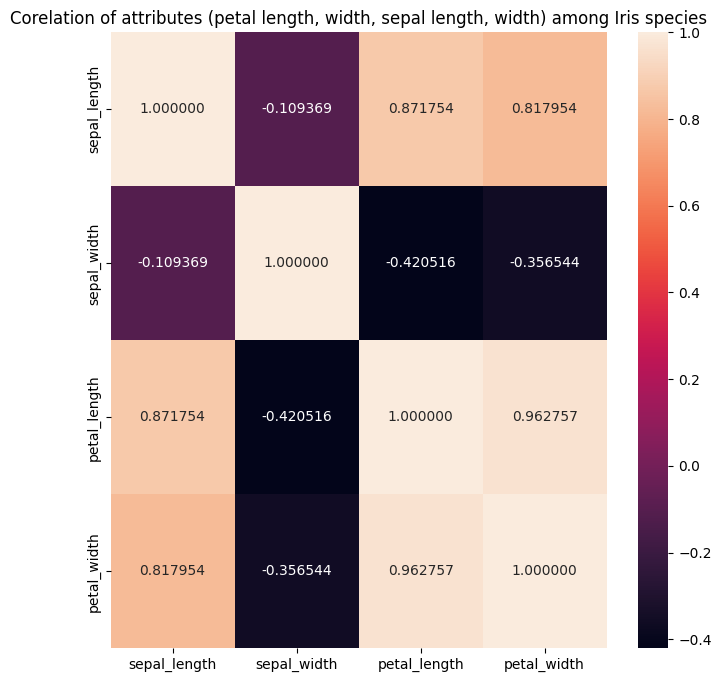

In [ ]:
plt.subplots(figsize = (8,8))
sns.heatmap(iris.corr(),annot=True,fmt="f").set_title("Corelation of attributes (petal length, width, sepal length, width) among Iris species")
plt.show()

## Dividing data into features and labels
![](https://miro.medium.com/max/1002/1*68H8EsCwfqJNxzYdPYtEDw.png)
The dataset contains five columns: SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm and Species. The actual features are described by columns 1-4. Last column contains labels of samples. Firstly we need to split data into two arrays: X (features) and y (labels).

In [ ]:
X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values

## Label encoding
![](https://miro.medium.com/max/772/1*QQe-4476Oy3_dI1vhb3dDg.png)

Labels are categorical. Classifiers generally do not accept string labels. We need to use a label encoder to transform them into numbers. Iris-setosa will correspond to 0, Iris-versicolor will correspond to 1 and Iris-virginica to 2.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# 3. Building Machine Learning Models

In [ ]:
#Metrics Import
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Import
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

### Splitting The Data into Training And Testing Dataset
![](https://data-flair.training/blogs/wp-content/uploads/sites/2/2018/08/1-16.png)

In [ ]:
#Train and Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Now we will train several Machine Learning models and compare their results. Note that because the dataset does not provide labels for their testing-set, we need to use the predictions on the training set to compare the algorithms with each other.

### 3.1 K Nearest Neighbor
K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning.

K-NN algorithm assumes the similarity between the new data and previous known data and classifies the new entry into the category that most of its neighbors belong to.

K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well fitting category by using K- NN algorithm.
![](https://www.kdnuggets.com/wp-content/uploads/rapidminer-knn-image1.jpg)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
accuracy_knn=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for KNN\n',cm)
print('accuracy_KNN : %.3f' %accuracy)
print('precision_KNN : %.3f' %precision)
print('recall_KNN: %.3f' %recall)
print('f1-score_KNN : %.3f' %f1)

Confusion matrix for KNN
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy_KNN : 0.978
precision_KNN : 0.978
recall_KNN: 0.978
f1-score_KNN : 0.978


##### Let's check the accuracy for various values of n for K-Nearest nerighbours

<ipython-input-72-7d905051aaab>:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=pd.Series()
<ipython-input-72-7d905051aaab>:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(accuracy_score(y_test,prediction)))
<ipython-input-72-7d905051aaab>:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(accuracy_score(y_test,prediction)))
<ipython-input-72-7d905051aaab>:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(accuracy_score(y_test,prediction)))
<ipython-input-72-7d905051aaab>:10: FutureWarning: The series.append method is deprecated and will be

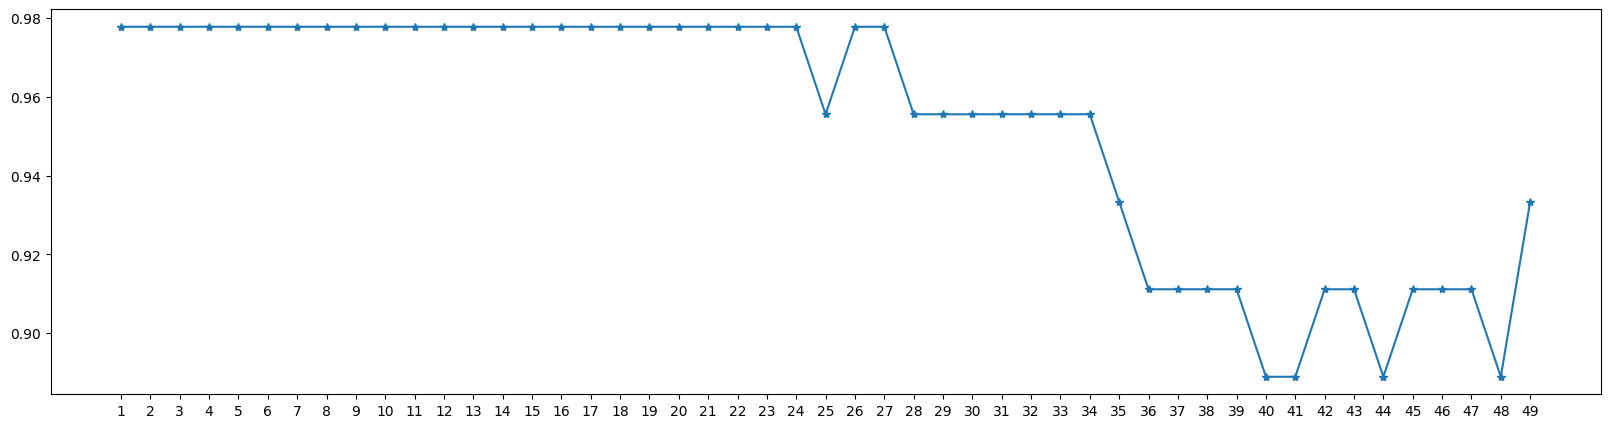

In [ ]:
plt.subplots(figsize=(20,5))
a_index=list(range(1,50))
a=pd.Series()
x=range(1,50)
#x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,50)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    prediction=model.predict(X_test)
    a=a.append(pd.Series(accuracy_score(y_test,prediction)))
plt.plot(a_index, a,marker="*")
plt.xticks(x)
plt.show()

Above is the graph showing the accuracy for the KNN models using different values of n.

### 3.2 Decision Tree:
A decision tree is a flowchart-like structure in which each internal node represents a test on a feature (e.g. whether a coin flip comes up heads or tails), each leaf node represents a class label (decision taken after computing all features) and branches represent conjunctions of features that lead to those class labels. The paths from root to leaf represent classification rules.
![](https://miro.medium.com/max/1000/1*LMoJmXCsQlciGTEyoSN39g.jpeg)

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
accuracy_dt = round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred, average='micro')
recall = recall_score(y_test, Y_pred, average='micro')
f1 = f1_score(y_test,Y_pred, average='micro')
print('Confusion matrix for DecisionTree\n', cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)

Confusion matrix for DecisionTree
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy_DecisionTree: 0.978
precision_DecisionTree: 0.978
recall_DecisionTree: 0.978
f1-score_DecisionTree : 0.978


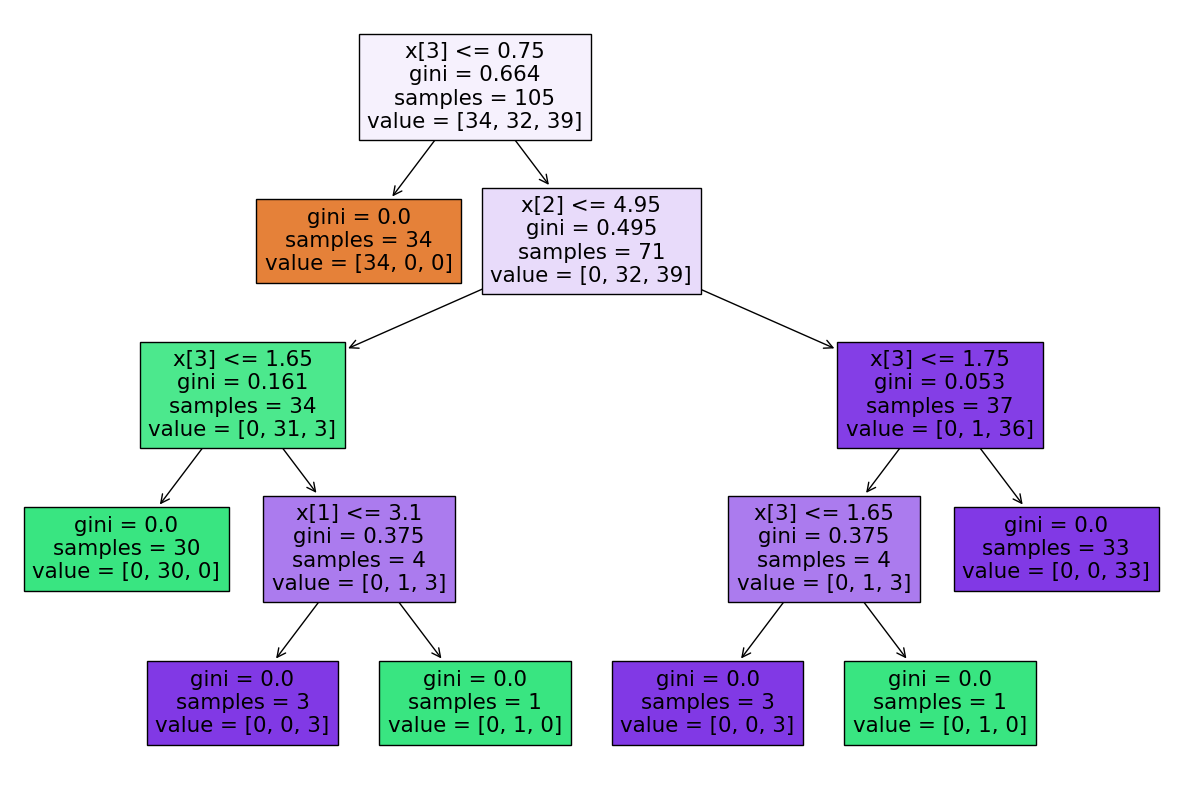

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15,10))
plot_tree(decision_tree.fit(X_train, y_train)  ,filled=True)
plt.show()

### 3.3 Gaussian Naive Bayes:
Naive Bayes is a classification algorithm for binary (two-class) and multi-class classification problems. The technique is easiest to understand when described using binary or categorical input values.

It is called naive Bayes or idiot Bayes because the calculation of the probabilities for each hypothesis are simplified to make their calculation tractable. Rather than attempting to calculate the values of each attribute value P(d1, d2, d3|h), they are assumed to be conditionally independent given the target value and calculated as P(d1|h) * P(d2|H) and so on.

This is a very strong assumption that is most unlikely in real data, i.e. that the attributes do not interact. Nevertheless, the approach performs surprisingly well on data where this assumption does not hold.
![](https://miro.medium.com/max/1200/0*qFuHAV7Vd09064q-.jpeg)

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000


### 3.4 Random Forest:
Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.
![](https://miro.medium.com/max/1170/1*58f1CZ8M4il0OZYg2oRN4w.png)

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_prediction)
accuracy = accuracy_score(y_test,Y_prediction)
precision =precision_score(y_test, Y_prediction,average='micro')
recall =  recall_score(y_test, Y_prediction,average='micro')
f1 = f1_score(y_test,Y_prediction,average='micro')
print('Confusion matrix for Random Forest\n',cm)
print('accuracy_random_Forest : %.3f' %accuracy)
print('precision_random_Forest : %.3f' %precision)
print('recall_random_Forest : %.3f' %recall)
print('f1-score_random_Forest : %.3f' %f1)


Confusion matrix for Random Forest
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy_random_Forest : 0.978
precision_random_Forest : 0.978
recall_random_Forest : 0.978
f1-score_random_Forest : 0.978


### 3.5 Logistic Regression:
Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability.

We can call a Logistic Regression a Linear Regression model but the Logistic Regression uses a more complex cost function, this cost function can be defined as the ‘Sigmoid function’ or also known as the ‘logistic function’ instead of a linear function.
![](https://miro.medium.com/max/570/1*50TdLe6f_AW8wnBBkyLYgw.png)

In [ ]:
logreg = LogisticRegression(solver= 'lbfgs',max_iter=400)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
accuracy_lr = round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_pred,)
accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred,average='micro')
recall = recall_score(y_test, Y_pred, average='micro')
f1 = f1_score(y_test, Y_pred, average='micro')
print('Confusion matrix for Logistic Regression\n', cm)
print('accuracy_Logistic Regression : %.3f' %accuracy)
print('precision_Logistic Regression : %.3f' %precision)
print('recall_Logistic Regression: %.3f' %recall)
print('f1-score_Logistic Regression : %.3f' %f1)

Confusion matrix for Logistic Regression
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy_Logistic Regression : 0.978
precision_Logistic Regression : 0.978
recall_Logistic Regression: 0.978
f1-score_Logistic Regression : 0.978


### 3.6 Linear Support Vector Machine:
Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well.
![](https://blog-c7ff.kxcdn.com/blog/wp-content/uploads/2017/02/Margin.png)

In [ ]:
linear_svc = LinearSVC(max_iter=4000)
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
accuracy_svc=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision = precision_score(y_test, Y_pred,average='micro')
recall = recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for SVC\n',cm)
print('accuracy_SVC: %.3f' %accuracy)
print('precision_SVC: %.3f' %precision)
print('recall_SVC: %.3f' %recall)
print('f1-score_SVC : %.3f' %f1)

Confusion matrix for SVC
 [[16  0  0]
 [ 0 15  3]
 [ 0  0 11]]
accuracy_SVC: 0.933
precision_SVC: 0.933
recall_SVC: 0.933
f1-score_SVC : 0.933


## Which is the best Model ?

In [ ]:
results = pd.DataFrame({
    'Model': [ 'KNN',
              'Logistic Regression',
              'Random Forest',
              'Naive Bayes',
              ' Support Vector Machine',
              'Decision Tree'],
    'Score': [ acc_knn,
              acc_log,
              acc_random_forest,
              acc_gaussian,
              acc_linear_svc,
              acc_decision_tree],
    "Accuracy_score":[accuracy_knn,
                      accuracy_lr,
                      accuracy_rf,
                      accuracy_nb,
                      accuracy_svc,
                      accuracy_dt
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(9)

,Model,Score,Accuracy_score
0,Naive Bayes,94.29,100.00
1,KNN,96.19,97.78
2,Logistic Regression,98.10,97.78
3,Random Forest,100.00,97.78
4,Decision Tree,100.00,97.78
5,Support Vector Machine,98.10,93.33


Best model for this data appears to have been Naive Bayes (100% Accuracy).

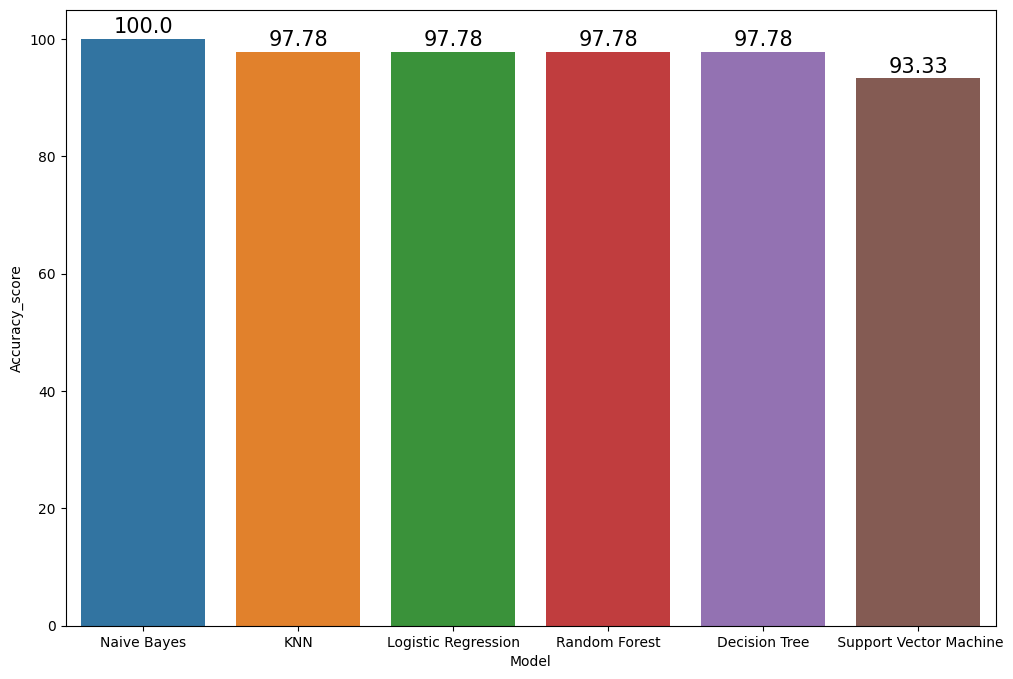

In [ ]:
plt.subplots(figsize=(12,8))
ax=sns.barplot(x='Model', y="Accuracy_score", data=result_df)
labels = (result_df["Accuracy_score"])
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center', size = 15, color = 'black')

# Assignment - Classify your own data
Use 3 different ML algorithms (out of the ones presented above) to obtain >65% accuracy on one of the following datasets:


*   Water potability - Predict if water is safe for human consumption
*   Will it rain tomorrow? - Predict whether there'll be rain in Africa tomorrow
*   Credit score - Predict the credit score of people
*   Wine quality - Predict the quality of wine
*   Fetal health - Predict whether a fetus is healthy or not

You can choose any of the 5 datasets do perform your analysis.
You may need to clean your data (e.g. remove or fill rows with NaN values, convert, encode, ignore columns with unsupported formats, etc.).

[Here](https://elitedatascience.com/python-cheat-sheet) is a cheatsheet with useful pandas methods.


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Data loading
data = pd.read_csv('WineQT.csv')

# Cleaning
print(data.isnull().sum())

# Spliting the data ->  features + target variable
X = data.drop('quality', axis=1)
y = data['quality']

# Spliting the data -> training + testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
svm = SVC(random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest
rf.fit(X_train_scaled, y_train)
rf_predictions = rf.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Hyperparameter tuning for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5)
grid_search_knn.fit(X_train_scaled, y_train)

best_params_knn = grid_search_knn.best_params_
print("Best parameters for KNN:", best_params_knn)

# KNN
knn_best = KNeighborsClassifier(**best_params_knn)
knn_best.fit(X_train_scaled, y_train)
knn_predictions = knn_best.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_predictions)

# SVM
svm.fit(X_train_scaled, y_train)
svm_predictions = svm.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print(f"Random Forest Classifier Accuracy: {rf_accuracy:.2f}")
print(f"K-Nearest Neighbors (KNN) Classifier Accuracy: {knn_accuracy:.2f}")
print(f"SVM Classifier Accuracy: {svm_accuracy:.2f}")


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64
Best parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
Random Forest Classifier Accuracy: 0.69
K-Nearest Neighbors (KNN) Classifier Accuracy: 0.69
SVM Classifier Accuracy: 0.66


In [27]:
# Extra --- ML Algorithms that are not presented in the laboratory
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv('WineQT.csv')

print(data.isnull().sum())

X = data.drop('quality', axis=1)
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)
gb_predictions = gb.predict(X_test_scaled)
gb_accuracy = accuracy_score(y_test, gb_predictions)

# Multi-layer Perceptron Classifier with modified parameters
mlp = MLPClassifier(random_state=42, max_iter=2000, tol=1e-3,
                    hidden_layer_sizes=(100, 50), activation='relu', solver='adam')
mlp.fit(X_train_scaled, y_train)
mlp_predictions = mlp.predict(X_test_scaled)
mlp_accuracy = accuracy_score(y_test, mlp_predictions)

# Extra Trees Classifier
extra_trees = ExtraTreesClassifier(random_state=42)
extra_trees.fit(X_train_scaled, y_train)
extra_trees_predictions = extra_trees.predict(X_test_scaled)
extra_trees_accuracy = accuracy_score(y_test, extra_trees_predictions)

print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")
print(f"MLP Classifier Accuracy: {mlp_accuracy:.2f}")
print(f"Extra Trees Classifier Accuracy: {extra_trees_accuracy:.2f}")


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64
Gradient Boosting Accuracy: 0.67
MLP Classifier Accuracy: 0.67
Extra Trees Classifier Accuracy: 0.69
